In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
dfMPG = sns.load_dataset('mpg')
dfMPG.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
dfMPG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null object
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
dfMPG.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
dfMPG[dfMPG['mpg']==9]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
28,9.0,8,304.0,193.0,4732,18.5,70,usa,hi 1200d


In [6]:
dfMPG[dfMPG['mpg']==46.6]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc


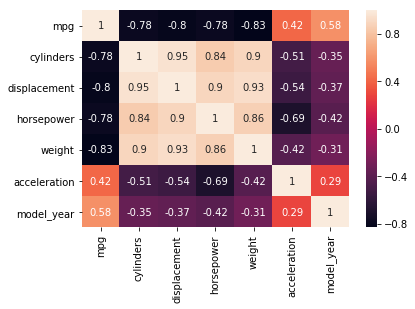

In [7]:
sns.heatmap(dfMPG.corr(),annot=True)

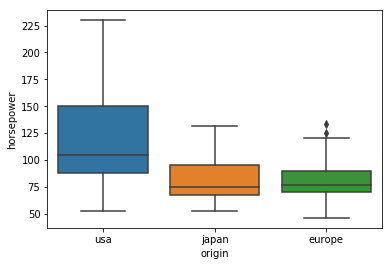

In [8]:
sns.boxplot(x='origin', y='horsepower', data=dfMPG)

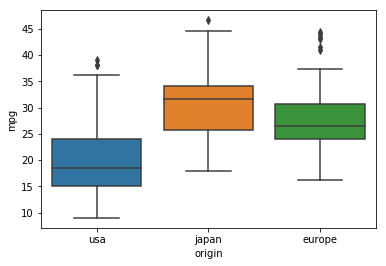

In [9]:
sns.boxplot('origin', y='mpg', data=dfMPG)

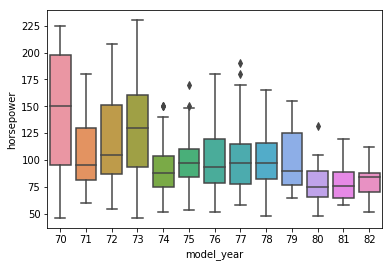

In [10]:
sns.boxplot(x='model_year', y='horsepower', data=dfMPG)

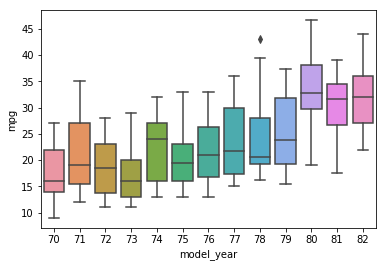

In [11]:
sns.boxplot(x='model_year', y='mpg', data=dfMPG)

In [12]:
dfMPG.groupby('origin').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
origin,,,,,,,
europe,27.891429,4.157143,109.142857,80.558824,2423.300000,16.787143,75.814286
japan,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038
usa,20.083534,6.248996,245.901606,119.048980,3361.931727,15.033735,75.610442


In [13]:
dfMPG.groupby('model_year').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration
model_year,,,,,,
70,17.689655,6.758621,281.413793,147.827586,3372.793103,12.948276
71,21.250000,5.571429,209.750000,107.037037,2995.428571,15.142857
72,18.714286,5.821429,218.375000,120.178571,3237.714286,15.125000
73,17.100000,6.375000,256.875000,130.475000,3419.025000,14.312500
74,22.703704,5.259259,171.740741,94.230769,2877.925926,16.203704
75,20.266667,5.600000,205.533333,101.066667,3176.800000,16.050000
76,21.573529,5.647059,197.794118,101.117647,3078.735294,15.941176
77,23.375000,5.464286,191.392857,105.071429,2997.357143,15.435714
78,24.061111,5.361111,177.805556,99.694444,2861.805556,15.805556


In [14]:
dfNull = dfMPG[dfMPG.horsepower.isna()].copy()
dfNull

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [15]:
def isi_horsepower(cols):
    hp = cols[0]
    my = cols[1]
    ori = cols[2]
    cyl = cols[3]
    
    if pd.isnull(hp):
        return (dfMPG[dfMPG['cylinders'] == cyl]['horsepower'].mean() + dfMPG[dfMPG['model_year'] == my]['horsepower'].mean() + dfMPG[dfMPG['origin'] == ori]['horsepower'].mean())/3

    else:
        return hp

In [16]:
dfMPG['horsepower'] = dfMPG[['horsepower','model_year','origin', 'cylinders']].apply(isi_horsepower,axis=1)
dfNull['horsepower'] = dfNull[['horsepower','model_year','origin', 'cylinders']].apply(isi_horsepower,axis=1)

In [17]:
dfNull

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,101.362328,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,104.960088,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,79.026849,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,91.754102,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,80.022031,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,93.028601,3035,20.5,82,usa,amc concord dl


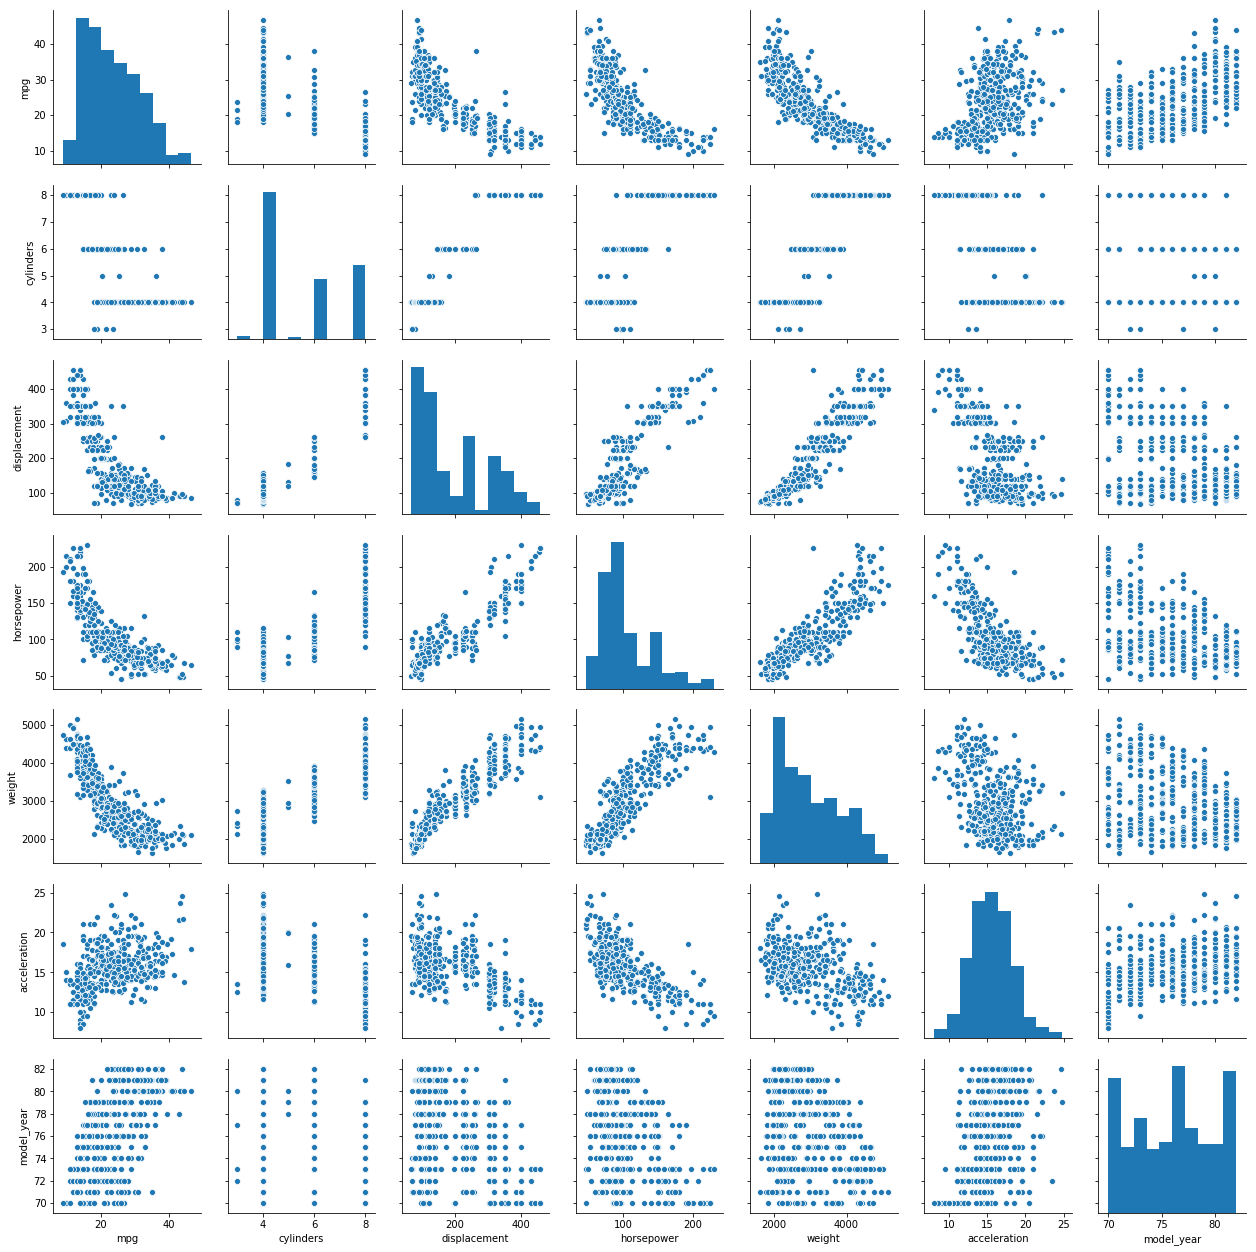

In [18]:
sns.pairplot(dfMPG)

In [19]:
cylinder = pd.get_dummies(dfMPG['cylinders'],drop_first=True)
modelyear = pd.get_dummies(dfMPG['model_year'],drop_first=True)
origin = pd.get_dummies(dfMPG['origin'],drop_first=True)
dfMPG.drop(['cylinders','origin','name', 'model_year', 'acceleration'],axis=1,inplace=True)
dfMPG = pd.concat([dfMPG,cylinder,modelyear,origin],axis=1)
dfMPG.head()

,mpg,displacement,horsepower,weight,4,5,6,8,71,72,...,75,76,77,78,79,80,81,82,japan,usa
0,18.0,307.0,130.0,3504,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,15.0,350.0,165.0,3693,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,18.0,318.0,150.0,3436,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,16.0,304.0,150.0,3433,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,17.0,302.0,140.0,3449,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
y = dfMPG['mpg']
X = dfMPG.drop('mpg', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
displacement,0.019595
horsepower,-0.037058
weight,-0.006168
4,6.106064
5,6.197016
6,4.113320
8,5.584450
71,0.545418
72,-0.610624
73,-0.827732


In [23]:
print(lm.intercept_)

34.92593981014756


In [24]:
predictions = lm.predict( X_test)

Text(0,0.5,'Predicted Y')

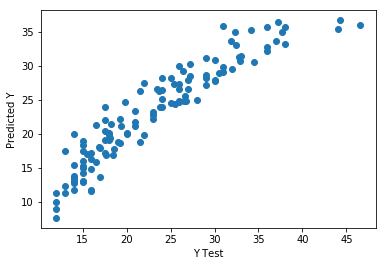

In [25]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [26]:
# calculate these metrics by hand!
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score:', metrics.r2_score(y_test,predictions))

MAE: 2.156602652783301
MSE: 7.949224327016588
RMSE: 2.819436881190389
R2 Score: 0.8731635939993757


E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


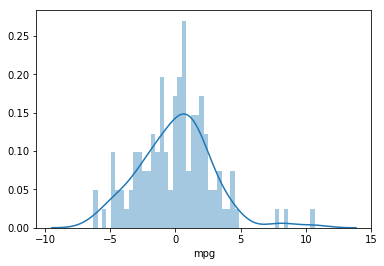

In [27]:
sns.distplot((y_test-predictions),bins=50);